In [1]:
import os
import pandas as pd
import numpy as np
import ast

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from utils import load_pickle, save_pickle
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Paths
project_root = os.path.dirname(os.getcwd())

encoded_data_path = os.path.join(project_root, "data", "encoded_symptom_dataset.csv")
label_encoder_path = os.path.join(project_root, "models", "label_encoder.pkl")
model_save_path = os.path.join(project_root, "models", "disease_classifier.pkl")


In [3]:
# Load the dataset
df = pd.read_csv(encoded_data_path)

# Load the saved label encoder
label_encoder = load_pickle(label_encoder_path)

print("Data and Label Encoder loaded successfully!")


Object loaded from c:\Users\ACER\gitClones\DoctorSathiProject\models\label_encoder.pkl
Data and Label Encoder loaded successfully!


In [4]:
# 'symptom_vector' column contains embeddings (but as strings in CSV)
# Convert them back to numpy arrays
X = np.vstack(df['symptom_vector'].apply(ast.literal_eval).values)

# Labels
y = df['label_encoded'].values

print(f"Feature shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Feature shape: (457, 200)
Labels shape: (457,)


In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 365
Testing samples: 92


In [23]:
# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [24]:
# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.00      0.00      0.00         1
                      Arthritis       0.00      0.00      0.00         1
               Bronchial Asthma       0.67      0.50      0.57         4
           Cervical spondylosis       0.50      0.50      0.50         4
                    Chicken pox       0.33      0.43      0.38         7
                    Common Cold       0.33      0.33      0.33         3
                         Dengue       0.31      0.44      0.36         9
          Dimorphic Hemorrhoids       0.00      0.00      0.00         2
               Fungal infection       0.00      0.00      0.00         2
                   Hypertension       0.00      0.00      0.00         2
                       Impetigo       0.60      0.75      0.67         4
                       Jaundice       0.75      0.60      0.67         5
                        Mal

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

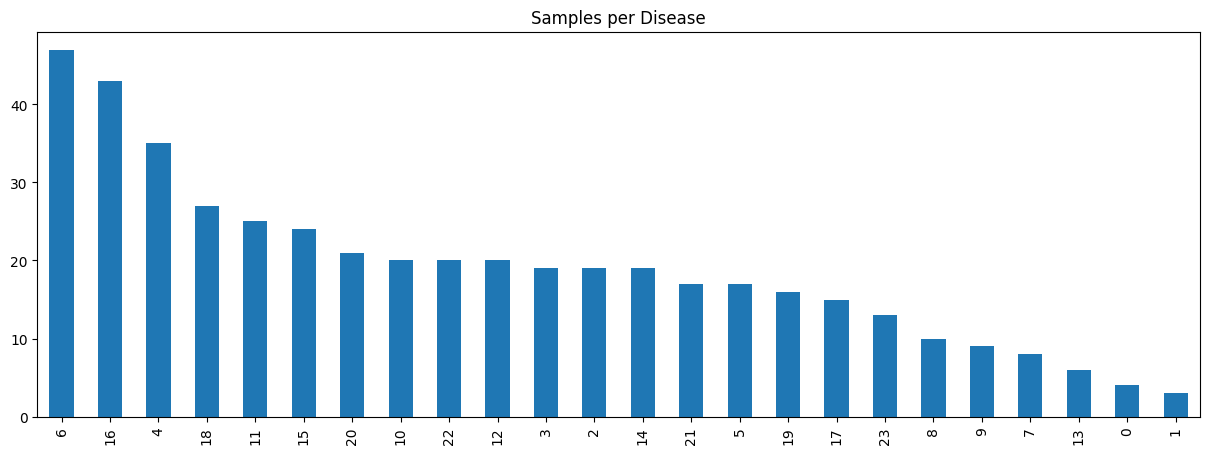

In [25]:
import matplotlib.pyplot as plt

class_counts = pd.Series(y).value_counts()
plt.figure(figsize=(15,5))
class_counts.plot(kind='bar')
plt.title('Samples per Disease')
plt.show()


In [26]:
from sklearn.utils.class_weight import compute_class_weight
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.00      0.00      0.00         1
                      Arthritis       0.25      1.00      0.40         1
               Bronchial Asthma       0.67      0.50      0.57         4
           Cervical spondylosis       0.67      0.50      0.57         4
                    Chicken pox       0.36      0.57      0.44         7
                    Common Cold       0.50      0.33      0.40         3
                         Dengue       0.33      0.33      0.33         9
          Dimorphic Hemorrhoids       0.00      0.00      0.00         2
               Fungal infection       0.00      0.00      0.00         2
                   Hypertension       0.00      0.00      0.00         2
                       Impetigo       0.75      0.75      0.75         4
                       Jaundice       0.75      0.60      0.67         5
                        Mal

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [6]:
# BEFORE SMOTE
print("Original dataset shape:", Counter(y))

Original dataset shape: Counter({6: 47, 16: 43, 4: 35, 18: 27, 11: 25, 15: 24, 20: 21, 10: 20, 12: 20, 22: 20, 14: 19, 2: 19, 3: 19, 5: 17, 21: 17, 19: 16, 17: 15, 23: 13, 8: 10, 9: 9, 7: 8, 13: 6, 0: 4, 1: 3})


In [8]:
# Initialize SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)

# Resample
X_resampled, y_resampled = sm.fit_resample(X, y)

# AFTER SMOTE
print("Resampled dataset shape:", Counter(y_resampled))

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACE

Resampled dataset shape: Counter({15: 47, 17: 47, 16: 47, 4: 47, 10: 47, 6: 47, 8: 47, 5: 47, 14: 47, 7: 47, 1: 47, 0: 47, 2: 47, 9: 47, 13: 47, 3: 47, 11: 47, 12: 47, 23: 47, 18: 47, 21: 47, 20: 47, 22: 47, 19: 47})


In [9]:
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
clf.fit(X_resampled, y_resampled)
# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         1
                      Arthritis       0.25      1.00      0.40         1
               Bronchial Asthma       1.00      0.50      0.67         4
           Cervical spondylosis       1.00      0.75      0.86         4
                    Chicken pox       0.83      0.71      0.77         7
                    Common Cold       0.50      0.33      0.40         3
                         Dengue       0.73      0.89      0.80         9
          Dimorphic Hemorrhoids       1.00      1.00      1.00         2
               Fungal infection       0.67      1.00      0.80         2
                   Hypertension       1.00      0.50      0.67         2
                       Impetigo       1.00      1.00      1.00         4
                       Jaundice       1.00      0.60      0.75         5
                        Mal